# Nursing Home Covid-19 Data Analysis

Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Libraries

In [2]:
from io import IncrementalNewlineDecoder
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import plotly.express as px

### Read Data

In [3]:
raw_data = pd.read_csv('/content/drive/MyDrive/Northeastern/Labs/IE5374/NursingHome/COVID-19 Nursing Home Data 08.28.2022.csv')
raw_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,41,42,43,44,45) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Week Ending,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,County,Submitted Data,...,Percentage of Current Residents Up to Date with COVID-19 Vaccines with No Medical Contraindications,Percentage of Current Residents with a Completed Vaccination Up to Date with COVID-19 Vaccines,Number of Healthcare Personnel with a Completed Vaccination Staying in this Facility for At Least 1 Day This Week who Received a COVID-19 Vaccine Booster at Any Time,Recent Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time,Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time,Number of Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines with No Medical Contraindications,Percentage of Current Healthcare Personnel with a Completed Vaccination Up to Date with COVID-19 Vaccines
0,05/24/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,05/31/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/07/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/14/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/21/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Display the number of rows and columns
print("Number of rows: {}".format(raw_data.shape[0]))
print("Number of cols: {}".format(raw_data.shape[1]))

Number of rows: 1816451
Number of cols: 120


## Data Investigation

In [5]:
raw_data.dtypes

Week Ending                                                                                                                         object
Federal Provider Number                                                                                                             object
Provider Name                                                                                                                       object
Provider Address                                                                                                                    object
Provider City                                                                                                                       object
                                                                                                                                    ...   
Number of Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines    float64
Recent Percentage of Curren

### Date variables

In [6]:
raw_data['WeekEndingTS'] = pd.to_datetime(raw_data['Week Ending'])
original_cols = raw_data.columns.tolist()
reorder_cols = original_cols[-1:] + original_cols[:-1]
raw_data = raw_data[reorder_cols]
raw_data.head()

,WeekEndingTS,Week Ending,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,County,...,Percentage of Current Residents Up to Date with COVID-19 Vaccines with No Medical Contraindications,Percentage of Current Residents with a Completed Vaccination Up to Date with COVID-19 Vaccines,Number of Healthcare Personnel with a Completed Vaccination Staying in this Facility for At Least 1 Day This Week who Received a COVID-19 Vaccine Booster at Any Time,Recent Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time,Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time,Number of Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines with No Medical Contraindications,Percentage of Current Healthcare Personnel with a Completed Vaccination Up to Date with COVID-19 Vaccines
0,2020-05-24,05/24/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-05-31,05/31/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-06-07,06/07/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-06-14,06/14/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-06-21,06/21/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
raw_data['reporting_year'] = raw_data['WeekEndingTS'].dt.year
original_cols = raw_data.columns.tolist()
reorder_cols = original_cols[-1:] + original_cols[:-1]
raw_data = raw_data[reorder_cols]
raw_data.head()

,reporting_year,WeekEndingTS,Week Ending,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,...,Percentage of Current Residents Up to Date with COVID-19 Vaccines with No Medical Contraindications,Percentage of Current Residents with a Completed Vaccination Up to Date with COVID-19 Vaccines,Number of Healthcare Personnel with a Completed Vaccination Staying in this Facility for At Least 1 Day This Week who Received a COVID-19 Vaccine Booster at Any Time,Recent Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time,Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time,Number of Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines with No Medical Contraindications,Percentage of Current Healthcare Personnel with a Completed Vaccination Up to Date with COVID-19 Vaccines
0,2020,2020-05-24,05/24/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,2020-05-31,05/31/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,2020-06-07,06/07/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,2020-06-14,06/14/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,2020-06-21,06/21/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# display the columns with maximum missing values
raw_data.isna().sum().sort_values(ascending=False)

Gloves No Longer Available in 7 Days                                                                                                                                                      1814582
Gowns No Longer Available in 7 Days                                                                                                                                                       1814582
Eye Protection No Longer Available in 7 Days                                                                                                                                              1814580
N95 Respirator No Longer Available in 7 Days                                                                                                                                              1814580
Face Masks No Longer Available in 7 Days                                                                                                                                                  1814579
Recent Percentage of Current R

### Dimension Dictionary

In [ ]:
dim_dict = {}
for i in range(raw_data.shape[1]):
    # dim_dict["col" + str(i+1)] = raw_data.columns[i]
    dim_dict[raw_data.columns[i]] = "Col" + str(i)

# # create list of original column names and transformed column names
# og_list = list(dim_dict.values())
# tf_list = list(dim_dict.keys())


In [ ]:
# function to return key for any value
# https://www.geeksforgeeks.org/python-get-key-from-value-in-dictionary/
def get_key(ddict, val):
    for key, value in ddict.items():
        if val == value:
            return key

### Transform Column Names

In [ ]:
tf_data = raw_data.copy(deep=True)
tf_data.rename(columns=dim_dict, inplace=True)
tf_data.head()

,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,...,Col110,Col111,Col112,Col113,Col114,Col115,Col116,Col117,Col118,Col119
0,05/24/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,05/31/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/07/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/14/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/21/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# tf_data = raw_data.copy(deep=True)
# for i in range(tf_data.shape[1]):
#     tf_data.columns.values[i] = tf_list[i]
# tf_data.head()

In [ ]:
# original data
raw_data.head()

,Week Ending,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,County,Submitted Data,...,Percentage of Current Residents Up to Date with COVID-19 Vaccines with No Medical Contraindications,Percentage of Current Residents with a Completed Vaccination Up to Date with COVID-19 Vaccines,Number of Healthcare Personnel with a Completed Vaccination Staying in this Facility for At Least 1 Day This Week who Received a COVID-19 Vaccine Booster at Any Time,Recent Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time,Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time,Number of Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines with No Medical Contraindications,Percentage of Current Healthcare Personnel with a Completed Vaccination Up to Date with COVID-19 Vaccines
0,05/24/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,05/31/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/07/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/14/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/21/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
tf_data.describe()

,Col6,Col7,Col11,Col12,Col13,Col14,Col15,Col16,Col17,Col18,...,Col110,Col111,Col112,Col113,Col114,Col115,Col116,Col117,Col118,Col119
count,1.816451e+06,1.816451e+06,1.796547e+06,1.796547e+06,1.796547e+06,1.796547e+06,1.796547e+06,1.796547e+06,1.796547e+06,1.796547e+06,...,968017.000000,968017.000000,785499.000000,14761.000000,967779.000000,188491.000000,14761.000000,967779.000000,967779.000000,967779.000000
mean,5.031145e+04,5.876505e+09,2.632105e-01,1.851226e+01,6.707083e-01,4.374520e+01,4.748437e-01,3.337861e+01,8.674418e-02,7.750832e+00,...,11.334818,12.674279,41.463624,55.661688,28.071264,61.565666,42.913605,8.682264,8.767077,9.734536
std,2.683933e+04,2.331702e+09,1.601575e+00,5.091688e+01,3.203611e+00,4.305624e+01,1.900089e+00,5.425571e+01,7.190060e-01,1.035255e+01,...,26.839732,29.644533,56.332304,26.410771,29.809028,63.514260,27.670881,21.655041,21.857298,23.696917
min,6.600000e+02,1.112223e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.982400e+04,3.867585e+09,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,0.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,4.000000,35.971000,0.000000,21.000000,21.488000,0.000000,0.000000,0.000000
50%,4.880100e+04,6.058923e+09,0.000000e+00,4.000000e+00,0.000000e+00,3.500000e+01,0.000000e+00,2.300000e+01,0.000000e+00,5.000000e+00,...,0.000000,0.000000,25.000000,53.179000,21.538000,45.000000,38.554000,0.000000,0.000000,0.000000
75%,7.285500e+04,8.022290e+09,0.000000e+00,1.600000e+01,0.000000e+00,6.600000e+01,1.000000e+00,4.400000e+01,0.000000e+00,1.100000e+01,...,0.000000,0.000000,56.000000,75.000000,47.154000,82.000000,62.069000,0.000000,0.000000,0.000000
max,9.992900e+04,1.000000e+10,4.460000e+02,1.726000e+03,3.120000e+02,6.020000e+02,9.860000e+02,2.988000e+03,8.900000e+01,1.390000e+02,...,100.000000,100.000000,1748.000000,100.000000,100.000000,1747.000000,100.000000,100.000000,100.000000,100.000000


### Numeric and Categorical Features

In [ ]:
num_dims = tf_data.columns[tf_data.dtypes != object]
cat_dims = tf_data.columns[tf_data.dtypes == object]

print("Number of numerical dimensions = {}".format(len(num_dims)))
print("Number of categorical dimensions = {}".format(len(cat_dims)))

Number of numerical dimensions = 98
Number of categorical dimensions = 22


### Null Value Counts

In [ ]:
print("Column Name -> Number of Null Values ")
print("=======================================================================")
nulls = tf_data.isnull().sum().to_frame()
for index, row in nulls.iterrows(): 
    print(get_key(dim_dict, index), " -> ", row[0])

Column Name -> Number of Null Values 
Week Ending  ->  0
Federal Provider Number  ->  0
Provider Name  ->  0
Provider Address  ->  0
Provider City  ->  0
Provider State  ->  0
Provider Zip Code  ->  0
Provider Phone Number  ->  0
County  ->  0
Submitted Data  ->  0
Passed Quality Assurance Check  ->  13292
Residents Weekly Admissions COVID-19  ->  19904
Residents Total Admissions COVID-19  ->  19904
Residents Weekly Confirmed COVID-19  ->  19904
Residents Total Confirmed COVID-19  ->  19904
Residents Weekly All Deaths  ->  19904
Residents Total All Deaths  ->  19904
Residents Weekly COVID-19 Deaths  ->  19904
Residents Total COVID-19 Deaths  ->  19904
Number of All Beds  ->  30115
Total Number of Occupied Beds  ->  26775
Staff Weekly Confirmed COVID-19  ->  19904
Staff Total Confirmed COVID-19  ->  19904
Staff Weekly COVID-19 Deaths  ->  19904
Staff Total COVID-19 Deaths  ->  19904
Shortage of Nursing Staff  ->  180413
Shortage of Clinical Staff  ->  180452
Shortage of Aides  ->  18041

In [ ]:
# function to get unique count per column in a data frame
def uniq_cnt_col(df):
    tot_cnt = df.count()
    # Count total number of non-null values
    tmp_df = pd.DataFrame(data=tot_cnt)
    tmp_df.columns = ['Total_NotNull'] 
    distincts = []
    for col in df.columns:
        # Get number of distinct values for each column
        distinct = df[col].nunique() 
        distincts.append(distinct)
    tmp_df['Distincts'] = distincts
    return tmp_df
    # return(np.transpose(tmp_df))

## Data Analytics

### Find the number of facilities in each state

In [ ]:
fac_df = tf_data.groupby(by='Col5', as_index=False)['Col1'].count()
sorted_fac_state = fac_df.sort_values(by='Col1', ascending=False)

In [ ]:
px.bar(sorted_fac_state, x='Col5', y='Col1', color='Col5',
       labels={'Col5':str(get_key(dim_dict, 'Col5')),
               'Col1':'Count of Facilities'}, height=400)

# plt.figure(figsize=(15,9))
# sns.barplot(x='Col5', y='Col1', data=sorted_fac_state)

### Count of unique facilities reported per year

In [10]:
raw_data.groupby('reporting_year')['Federal Provider Number'].nunique()

reporting_year
2020    15424
2021    15428
2022    15240
Name: Federal Provider Number, dtype: int64

## Feature Selection

In [25]:
selected_data = raw_data[['reporting_year', 'WeekEndingTS', 
                          'Federal Provider Number', 
                          'Total Resident Confirmed COVID-19 Cases Per 1,000 Residents',
                          'Total Resident COVID-19 Deaths Per 1,000 Residents',
                          'Initial Confirmed COVID-19 Case This Week',
                          'Three or More Confirmed COVID-19 Cases This Week',
                          'Total Resident Confirmed COVID-19 Cases Per 1,000 Residents',
                          'Weekly Resident Confirmed COVID-19 Cases Per 1,000 Residents',
                          'Weekly Resident COVID-19 Deaths Per 1,000 Residents',
                          'Total Resident COVID-19 Deaths Per 1,000 Residents',
                          'Number of All Beds',
                          'Total Number of Occupied Beds',
                          'Number of Residents with a New Positive COVID-19 Test Result',
                          'Number of Residents with New Influenza',
                          'Number of Staff and/or Personnel with New Influenza',
                          'Number of Staff and/or Personnel with a New Positive COVID-19 Test Result',
                          'Residents Weekly Confirmed COVID-19',
                          'Residents Weekly Admissions COVID-19',
                          'Residents Total Admissions COVID-19',
                          'Staff Weekly COVID-19 Deaths',
                          'Residents Total Confirmed COVID-19',
                          'Residents Weekly All Deaths',
                          'Residents Total All Deaths',
                          'Residents Weekly COVID-19 Deaths',
                          'Residents Total COVID-19 Deaths',
                          'Staff Weekly Confirmed COVID-19',
                          'Staff Total Confirmed COVID-19',
                          'Staff Total COVID-19 Deaths']]

In [26]:
rename_cols = {
    'Federal Provider Number': 'facility_id',
    'Total Resident Confirmed COVID-19 Cases Per 1,000 Residents': 'tot_res_conf_cases_per_1000',
    'Total Resident COVID-19 Deaths Per 1,000 Residents': 'tot_res_deaths_per_1000',
    'Initial Confirmed COVID-19 Case This Week': 'init_conf_cases',
    'Three or More Confirmed COVID-19 Cases This Week': 'wkly_conf_cases_threeplus',
    'Weekly Resident Confirmed COVID-19 Cases Per 1,000 Residents': 'wkly_res_conf_cases_per_1000',
    'Weekly Resident COVID-19 Deaths Per 1,000 Residents': 'wkly_res_deaths_per_1000',
    'Number of All Beds': 'tot_num_beds',
    'Total Number of Occupied Beds': 'tot_occu_beds',
    'Number of Residents with a New Positive COVID-19 Test Result': 'num_res_new_cov',
    'Number of Residents with New Influenza': 'num_res_new_flu',
    'Number of Staff and/or Personnel with New Influenza': 'num_stf_flu',
    'Number of Staff and/or Personnel with a New Positive COVID-19 Test Result': 'num_stf_new_cov',
    'Residents Weekly Confirmed COVID-19': 'wkly_res_conf_cases',
    'Residents Weekly Admissions COVID-19': 'wkly_res_admits',
    'Residents Total Admissions COVID-19': 'tot_res_admits',
    'Staff Weekly COVID-19 Deaths': 'skly_stf_deaths',
    'Residents Total Confirmed COVID-19': 'res_tot_conf_cases',
    'Residents Weekly All Deaths': 'wkly_tot_res_all_deaths',
    'Residents Total All Deaths': 'tot_res_all_deaths',
    'Residents Weekly COVID-19 Deaths': 'wkly_res_cov_deaths',
    'Residents Total COVID-19 Deaths': 'tot_res_cov_deaths',
    'Staff Weekly Confirmed COVID-19': 'wkly_stf_conf_cases',
    'Staff Total Confirmed COVID-19': 'stf_conf_cov',
    'Staff Total COVID-19 Deaths': 'tot_stf_cov_deaths'
}
selected_data.rename(columns=rename_cols, inplace=True)
selected_data.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,reporting_year,WeekEndingTS,facility_id,tot_res_conf_cases_per_1000,tot_res_deaths_per_1000,init_conf_cases,wkly_conf_cases_threeplus,tot_res_conf_cases_per_1000,wkly_res_conf_cases_per_1000,wkly_res_deaths_per_1000,tot_res_deaths_per_1000,tot_num_beds,tot_occu_beds,num_res_new_cov,num_res_new_flu,num_stf_flu,num_stf_new_cov,wkly_res_conf_cases,wkly_res_admits,tot_res_admits,skly_stf_deaths,res_tot_conf_cases,wkly_tot_res_all_deaths,tot_res_all_deaths,wkly_res_cov_deaths,tot_res_cov_deaths,wkly_stf_conf_cases,stf_conf_cov,tot_stf_cov_deaths
0,2020,2020-05-24,15009,1000.00,88.89,NaN,NaN,1000.00,1000.0,88.89,88.89,57.0,45.0,0.0,0.0,0.0,0.0,45.0,1.0,1.0,0.0,45.0,4.0,4.0,4.0,4.0,33.0,33.0,0.0
1,2020,2020-05-31,15009,1071.43,95.24,N,N,1071.43,0.0,0.00,95.24,57.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,45.0,0.0,4.0,0.0,4.0,2.0,35.0,0.0
2,2020,2020-06-07,15009,1046.51,93.02,N,N,1046.51,0.0,0.00,93.02,57.0,43.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,45.0,0.0,4.0,0.0,4.0,0.0,35.0,0.0
3,2020,2020-06-14,15009,1046.51,93.02,N,N,1046.51,0.0,0.00,93.02,57.0,43.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,45.0,0.0,4.0,0.0,4.0,0.0,35.0,0.0
4,2020,2020-06-21,15009,1000.00,88.89,N,N,1000.00,0.0,0.00,88.89,57.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,45.0,0.0,4.0,0.0,4.0,0.0,35.0,0.0


In [27]:
# number of missing values in selected columns
selected_data.isnull().sum()

reporting_year                      0
WeekEndingTS                        0
facility_id                         0
tot_res_conf_cases_per_1000     33499
tot_res_deaths_per_1000         33499
init_conf_cases                 47426
wkly_conf_cases_threeplus       47426
tot_res_conf_cases_per_1000     33499
wkly_res_conf_cases_per_1000    33499
wkly_res_deaths_per_1000        33499
tot_res_deaths_per_1000         33499
tot_num_beds                    30115
tot_occu_beds                   26775
num_res_new_cov                 29505
num_res_new_flu                 29505
num_stf_flu                     29505
num_stf_new_cov                 29505
wkly_res_conf_cases             19904
wkly_res_admits                 19904
tot_res_admits                  19904
skly_stf_deaths                 19904
res_tot_conf_cases              19904
wkly_tot_res_all_deaths         19904
tot_res_all_deaths              19904
wkly_res_cov_deaths             19904
tot_res_cov_deaths              19904
wkly_stf_con

## Visualization

### Correlation HeatMap

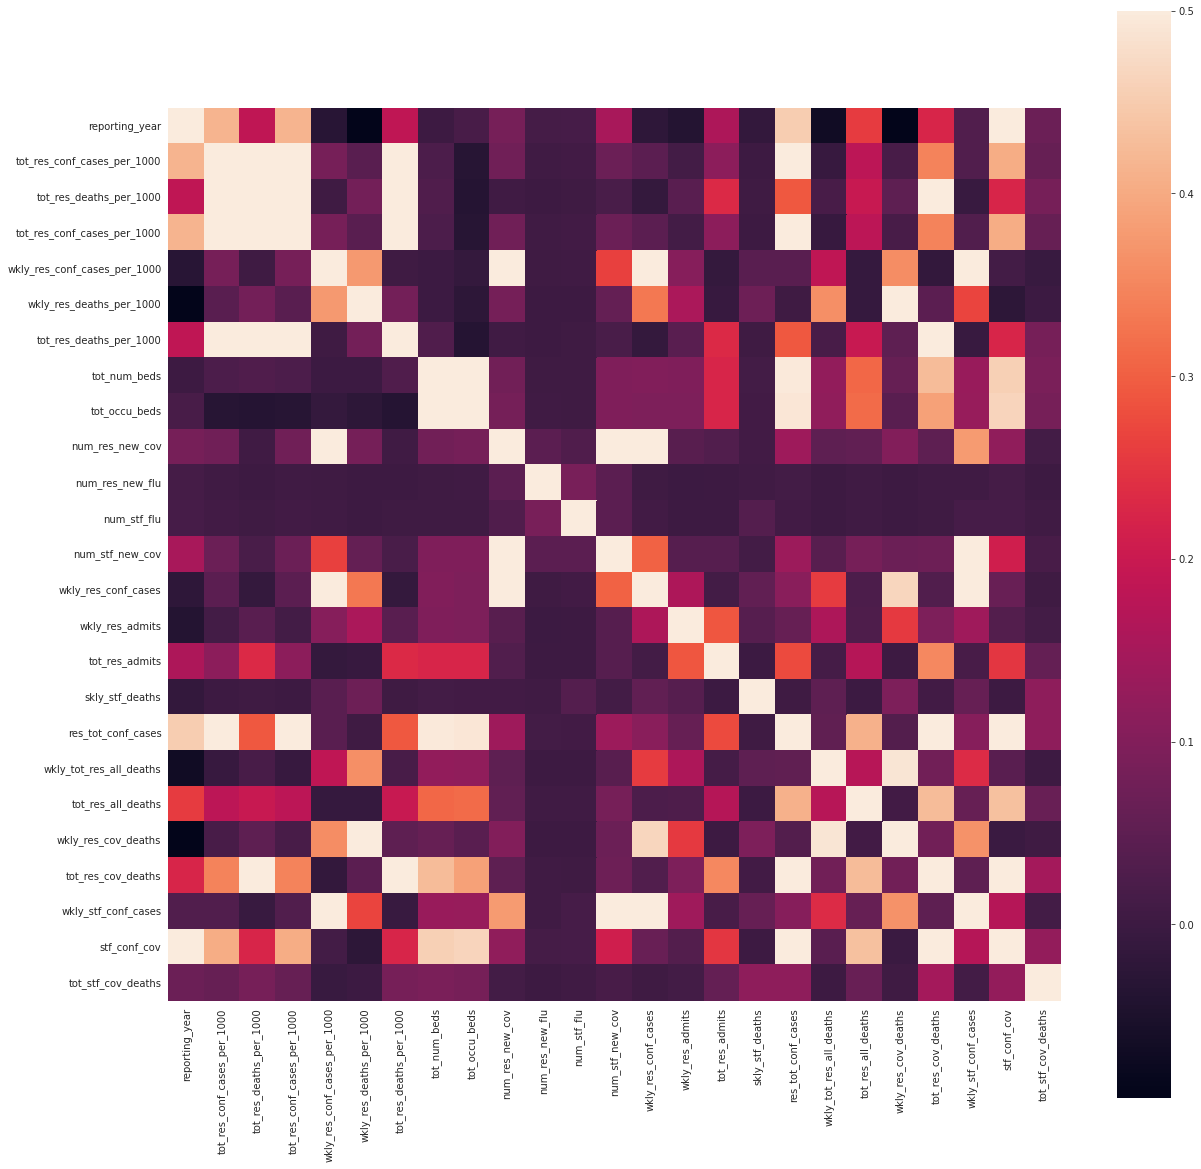

In [28]:
corr_matrix = selected_data.corr()

fig = plt.figure(figsize = (20, 20))
sns.heatmap(corr_matrix, vmax = .5, square = True)
plt.show()

### Numeric Dimension Distribution

Plotting Histogram Distribution of Numeric Features on 80% of Data Sample = (1453161, 29)


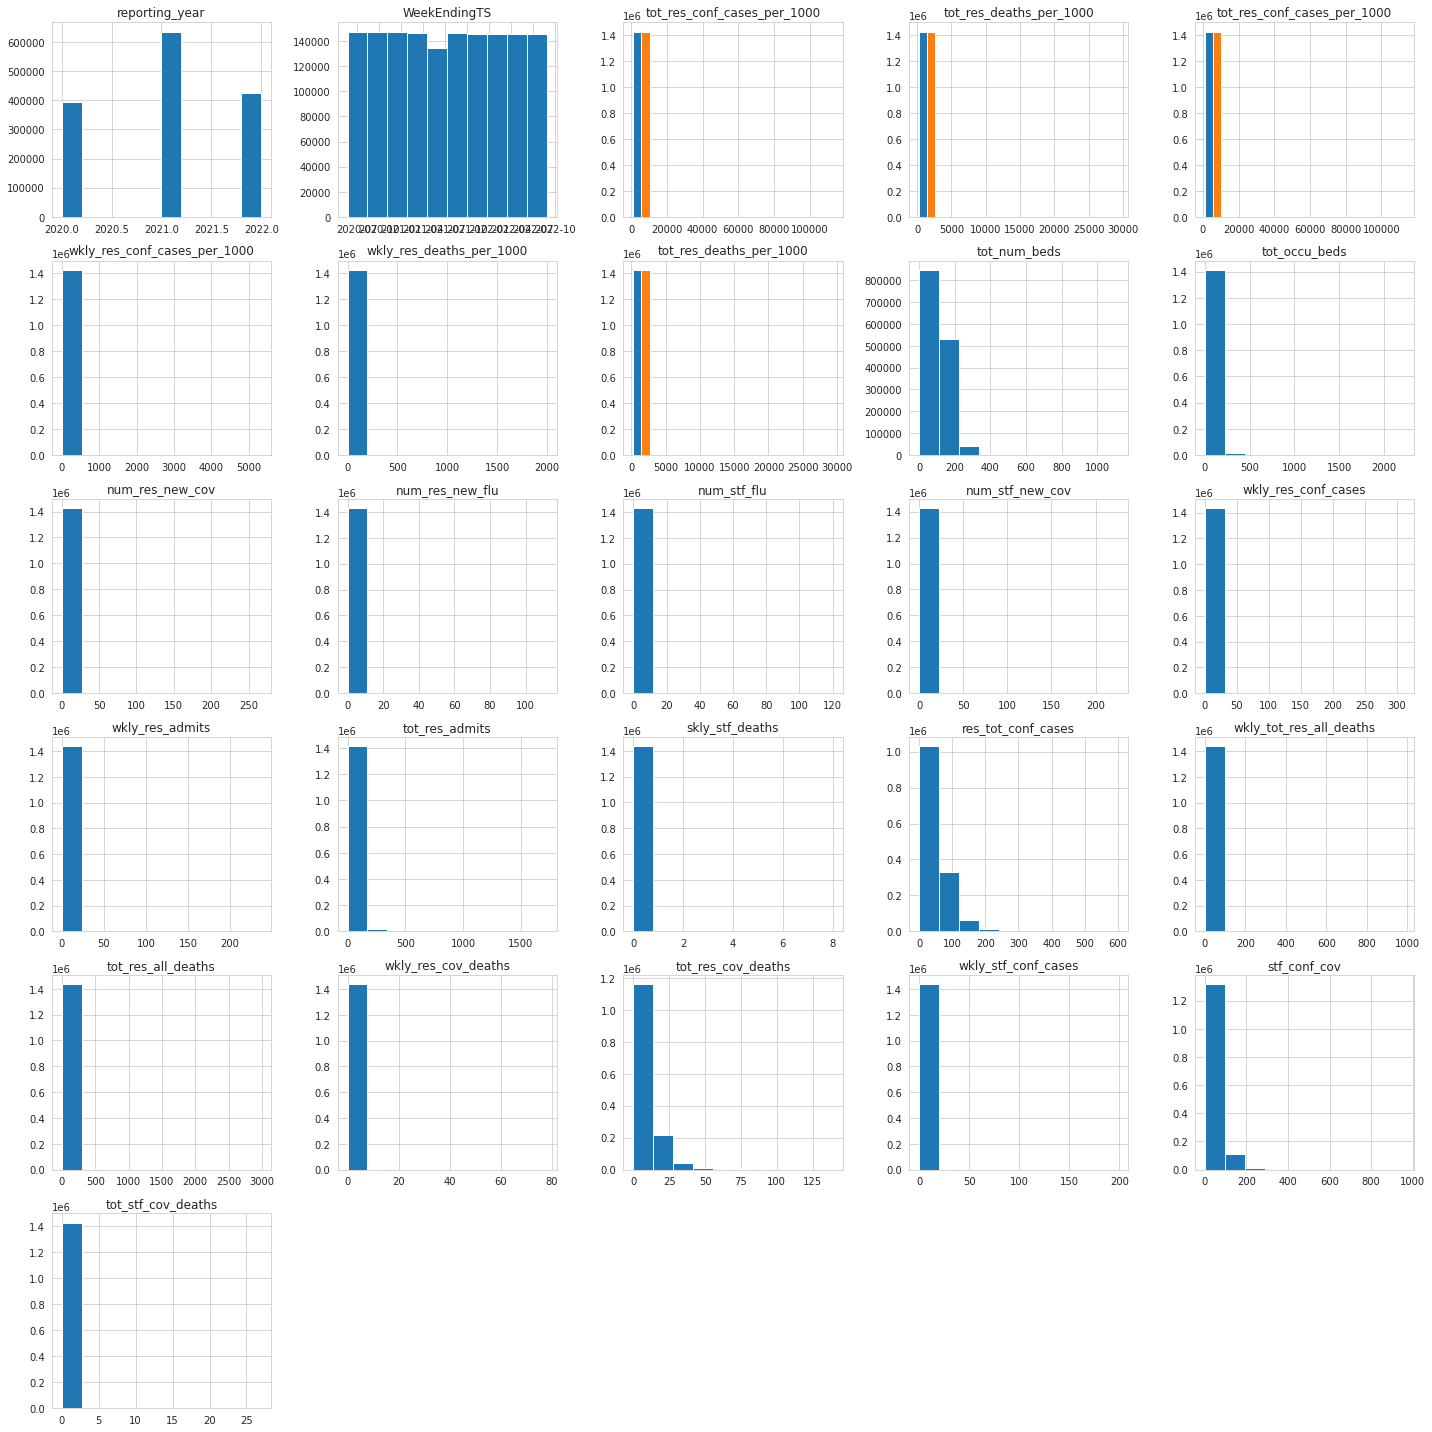

In [29]:
sample_data = selected_data.sample(frac = 0.8, random_state = 365)
print("Plotting Histogram Distribution of Numeric Features \
on 80% of Data Sample = {}".format(sample_data.shape))
sample_data.hist(figsize = (20, 20))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

### Categorical Dimension Distribution

In [30]:
# cat_df = tf_data[[col for col in cat_dims]]
# cat_df.head()

In [ ]:
# sns.countplot(y='Col1', data=cat_df)

## Feature Engineering